In [114]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
import CM4Xutils
CM4Xutils.__version__

'0.2.1'

In [116]:
import warnings
import dask
import xarray as xr
import matplotlib.pyplot as plt

import doralite
import gfdl_utils.core as gu

In [117]:
import sys
sys.path.insert(1, '../scipts')
from scripts.remap_functions import remap_budgets_to_sigma2_and_coarsen

In [118]:
grid = CM4Xutils.load_wmt_grid(
    "CM4Xp125",
    interval=str(1850),
    dmget=True
)
display(grid._ds)

Loading CM4Xp125-piControl for interval `1850`.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Loading CM4Xp125-historical for interval `1850`.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Overriding CM4Xp125 grid coordinates from supergrid.
Regridding ice
Skipping average_DT because independent of 'X' and 'Y' dims.
Skipping average_T1 because independent of 'X' and 'Y' dims.
Skipping average_T2 because independent of 

<xarray.Dataset> Size: 1TB
Dimensions:                         (exp: 2, time: 60, z_l: 35, yh: 1120,
                                     xh: 1440, nv: 2, z_i: 36, xq: 1441,
                                     yq: 1121, time_bounds: 61)
Coordinates: (12/29)
  * exp                             (exp) object 16B 'forced' 'control'
  * nv                              (nv) float64 16B 1.0 2.0
  * z_i                             (z_i) float64 288B 0.0 5.0 ... 6.75e+03
  * z_l                             (z_l) float64 280B 2.5 10.0 ... 6.5e+03
  * time                            (time) object 480B 1850-01-16 12:00:00 .....
  * time_bounds                     (time_bounds) object 488B 1850-01-01 00:0...
    ...                              ...
    geolon_c                        (yq, xq) float64 13MB -298.6 -298.4 ... 60.0
    geolat_c                        (yq, xq) float64 13MB -82.47 ... 64.03
    deptho                          (yh, xh) float32 6MB 0.0 0.0 0.0 ... 0.0 0.0
    wet                             (yh, xh) float32 6MB 0.0 0.0 0.0 ... 0.0 0.0
    wet_u                           (yh, xq) float32 6MB 0.0 0.0 0.0 ... 0.0 0.0
    wet_v                           (yq, xh) float32 6MB 0.0 0.0 0.0 ... 0.0 0.0
Data variables: (12/49)
    S_advection_xy                  (exp, time, z_l, yh, xh) float32 27GB dask.array<chunksize=(1, 1, 35, 1120, 1440), meta=np.ndarray>
    average_DT                      (exp, time) timedelta64[ns] 960B dask.array<chunksize=(1, 1), meta=np.ndarray>
    average_T1                      (exp, time) object 960B dask.array<chunksize=(1, 1), meta=np.ndarray>
    average_T2                      (exp, time) object 960B dask.array<chunksize=(1, 1), meta=np.ndarray>
    time_bnds                       (exp, time, nv) object 2kB dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    Sh_tendency_vert_remap          (exp, time, z_l, yh, xh) float32 27GB dask.array<chunksize=(1, 1, 35, 1120, 1440), meta=np.ndarray>
    ...                              ...
    RAIN                            (exp, time, yh, xh) float32 774MB dask.array<chunksize=(1, 1, 373, 480), meta=np.ndarray>
    SNOWFL                          (exp, time, yh, xh) float32 774MB dask.array<chunksize=(1, 1, 373, 480), meta=np.ndarray>
    siconc                          (exp, time, yh, xh) float32 774MB dask.array<chunksize=(1, 1, 373, 480), meta=np.ndarray>
    sithick                         (exp, time, yh, xh) float32 774MB dask.array<chunksize=(1, 1, 373, 480), meta=np.ndarray>
    sigma2                          (exp, time, z_l, yh, xh) float64 54GB dask.array<chunksize=(1, 1, 35, 1120, 1440), meta=np.ndarray>
    sigma2_bounds                   (exp, z_l, yh, xh, time_bounds) float64 55GB dask.array<chunksize=(1, 35, 1120, 1440, 1), meta=np.ndarray>
Attributes:
    filename:            ocean_monthly_z_d2.185001-185412.S_advection_xy.nc
    title:               CM4_historical_c192_OM4p125
    grid_type:           regular
    grid_tile:           N/A
    associated_files:    areacello: 18500101.D2ocean_static.nc
    history:             Fri Jun  9 01:32:07 2023: ncatted -O -a associated_f...
    NCO:                 netCDF Operators version 5.0.1 (Homepage = http://nc...
    external_variables:  volcello
    model:               CM4Xp125
    description:         The CM4Xp125 experimental design following Griffies ...

In [119]:
grid._ds.wet.attrs

{'long_name': '0 if land, 1 if ocean at tracer points',
 'cell_methods': 'xh:mean yh:mean time:point',
 'cell_measures': 'area: areacello',
 'note': 'Can be between 0 and 1 if coarse cell includes both wet and dry sub-cells.'}

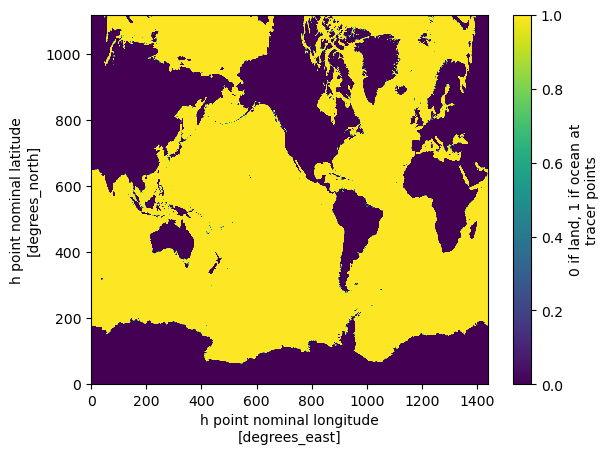

In [120]:
grid._ds.wet.plot()

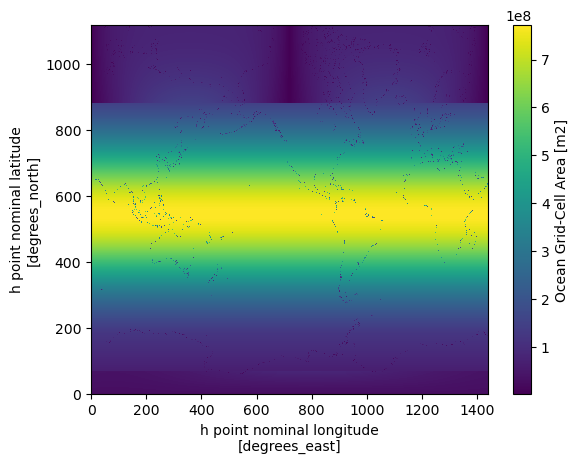

In [121]:
grid._ds.areacello.plot()

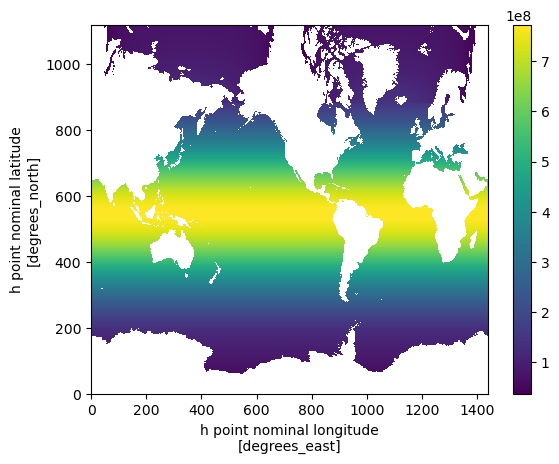

In [122]:
(grid._ds.areacello/grid._ds.wet).fillna(0.).plot()

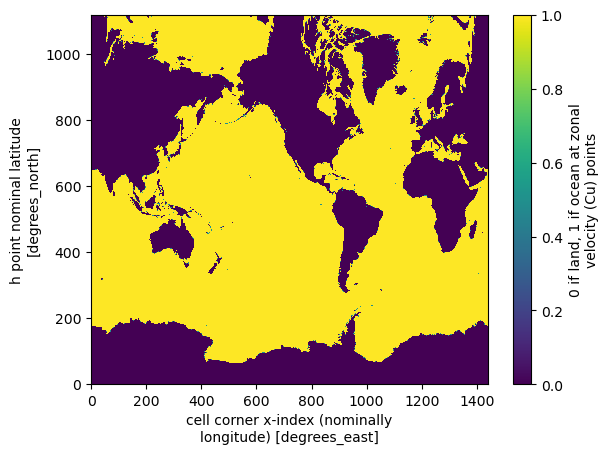

In [123]:
grid._ds.wet_u.fillna(0.).plot()

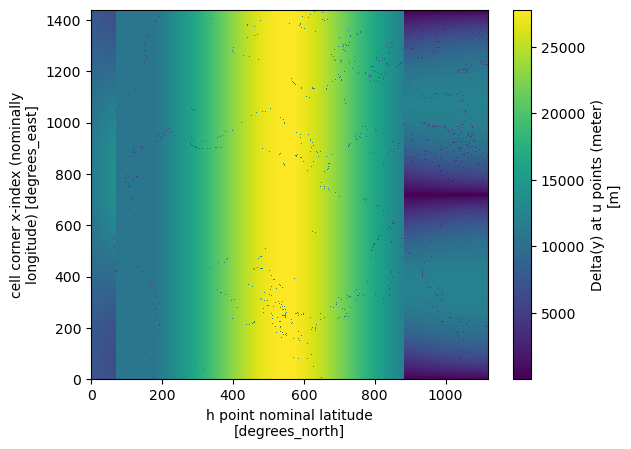

In [124]:
grid._ds.dyCu.fillna(0.).plot()

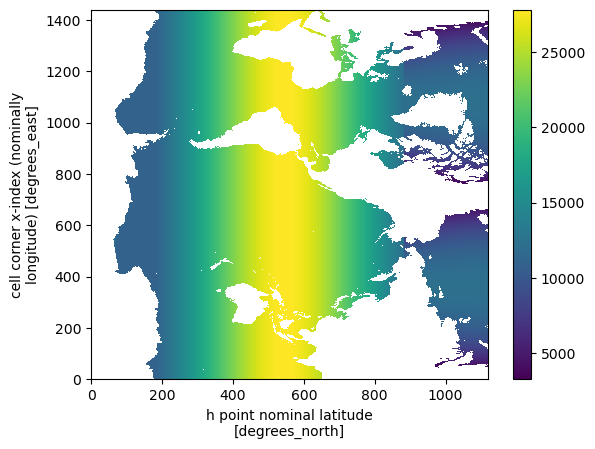

In [125]:
(grid._ds.dyCu/grid._ds.wet_u).fillna(0.).plot()

In [126]:
ds = remap_budgets_to_sigma2_and_coarsen("CM4Xp25", 2050)
display(ds)

Loading CM4Xp25-piControl for interval `2050`.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Loading CM4Xp25-ssp585 for interval `2050`.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Overriding CM4Xp25 grid coordinates from supergrid.
Regridding ice
Inferring Z grid coordinate: depth `z_`
Inferring Z grid coordinate: density `sigma2`


<xarray.Dataset> Size: 12GB
Dimensions:                         (exp: 2, time: 60, yh: 90, xh: 120,
                                     sigma2_l: 74, time_bounds: 61, xq: 121,
                                     yq: 91, sigma2_i: 75)
Coordinates: (12/30)
  * exp                             (exp) object 16B 'forced' 'control'
  * time                            (time) object 480B 2050-01-16 12:00:00 .....
    time_since_init                 (time) object 480B dask.array<chunksize=(60,), meta=np.ndarray>
    geolon                          (yh, xh) float64 86kB dask.array<chunksize=(90, 120), meta=np.ndarray>
    lon                             (yh, xh) float64 86kB dask.array<chunksize=(90, 120), meta=np.ndarray>
    geolat                          (yh, xh) float64 86kB dask.array<chunksize=(90, 120), meta=np.ndarray>
    ...                              ...
  * xh                              (xh) int64 960B 0 1 2 3 ... 116 117 118 119
  * yh                              (yh) int64 720B 0 1 2 3 4 ... 85 86 87 88 89
  * xq                              (xq) int64 968B 0 1 2 3 ... 117 118 119 120
  * yq                              (yq) int64 728B 0 1 2 3 4 ... 86 87 88 89 90
  * sigma2_i                        (sigma2_i) float64 600B -3.0 11.49 ... 39.0
    rho2_i                          (sigma2_i) float64 600B dask.array<chunksize=(75,), meta=np.ndarray>
Data variables: (12/38)
    thkcello                        (exp, time, sigma2_l, yh, xh) float32 384MB dask.array<chunksize=(2, 60, 74, 90, 120), meta=np.ndarray>
    thkcello_bounds                 (exp, time_bounds, sigma2_l, yh, xh) float32 390MB dask.array<chunksize=(2, 61, 74, 90, 120), meta=np.ndarray>
    S_advection_xy                  (exp, time, sigma2_l, yh, xh) float32 384MB dask.array<chunksize=(2, 60, 74, 90, 120), meta=np.ndarray>
    Sh_tendency_vert_remap          (exp, time, sigma2_l, yh, xh) float32 384MB dask.array<chunksize=(2, 60, 74, 90, 120), meta=np.ndarray>
    T_advection_xy                  (exp, time, sigma2_l, yh, xh) float32 384MB dask.array<chunksize=(2, 60, 74, 90, 120), meta=np.ndarray>
    Th_tendency_vert_remap          (exp, time, sigma2_l, yh, xh) float32 384MB dask.array<chunksize=(2, 60, 74, 90, 120), meta=np.ndarray>
    ...                              ...
    LSNK                            (exp, time, yh, xh) float32 5MB dask.array<chunksize=(2, 60, 90, 120), meta=np.ndarray>
    LSRC                            (exp, time, yh, xh) float32 5MB dask.array<chunksize=(2, 60, 90, 120), meta=np.ndarray>
    RAIN                            (exp, time, yh, xh) float32 5MB dask.array<chunksize=(2, 60, 90, 120), meta=np.ndarray>
    SNOWFL                          (exp, time, yh, xh) float32 5MB dask.array<chunksize=(2, 60, 90, 120), meta=np.ndarray>
    siconc                          (exp, time, yh, xh) float32 5MB dask.array<chunksize=(2, 60, 90, 120), meta=np.ndarray>
    sithick                         (exp, time, yh, xh) float32 5MB dask.array<chunksize=(2, 60, 90, 120), meta=np.ndarray>
Attributes:
    filename:            ocean_monthly_z.205001-205412.S_advection_xy.nc
    title:               CM4_ssp585_c192_OM4p25
    associated_files:    areacello: 20500101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  volcello areacello
    model:               CM4Xp25
    description:         The CM4Xp25 experimental design following Griffies e...
    provenance:          Diagnostics have been conservatively remapped into m...

(40.0, 80.0)

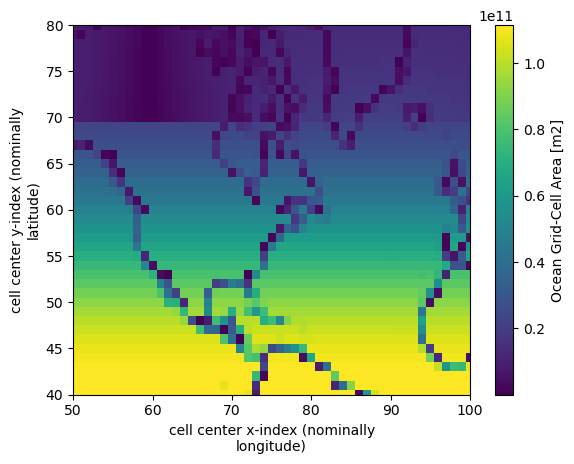

In [127]:
(ds.areacello).plot()
plt.xlim(50, 100)
plt.ylim(40, 80)

(40.0, 80.0)

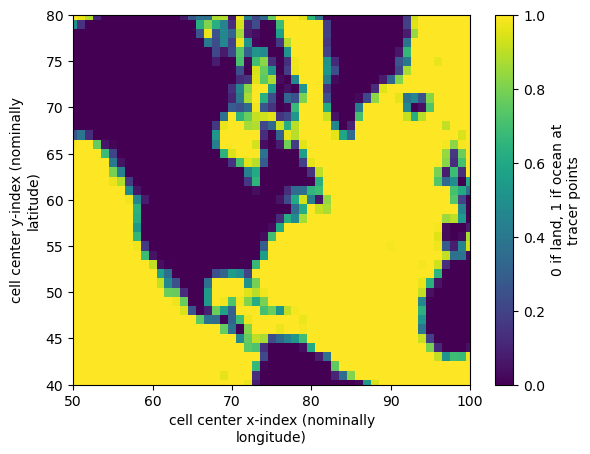

In [128]:
ds.wet.plot()
plt.xlim(50, 100)
plt.ylim(40, 80)

(40.0, 80.0)

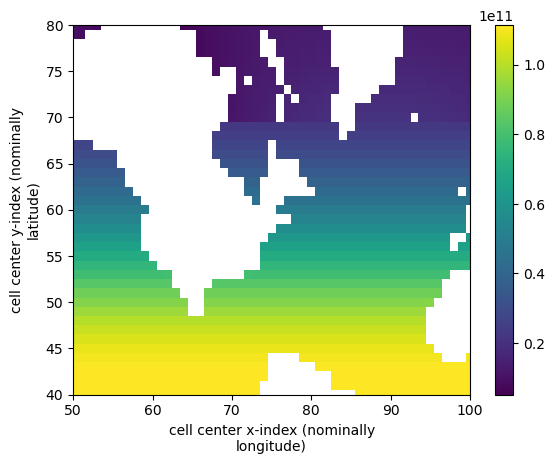

In [129]:
(ds.areacello/ds.wet).fillna(0.).plot()
plt.xlim(50, 100)
plt.ylim(40, 80)

(40.0, 80.0)

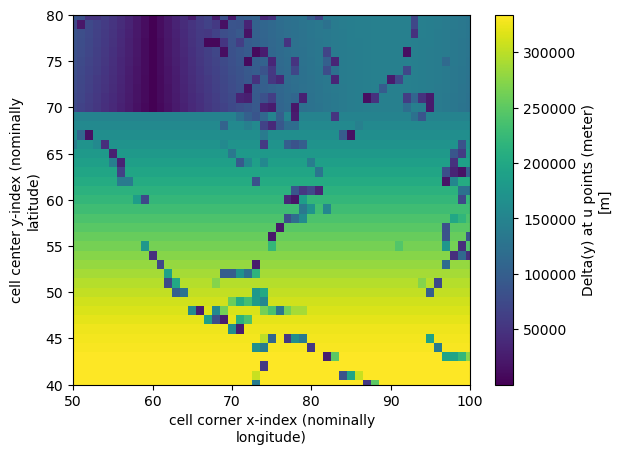

In [130]:
(ds.dyCu).fillna(0.).plot()
plt.xlim(50, 100)
plt.ylim(40, 80)

(40.0, 80.0)

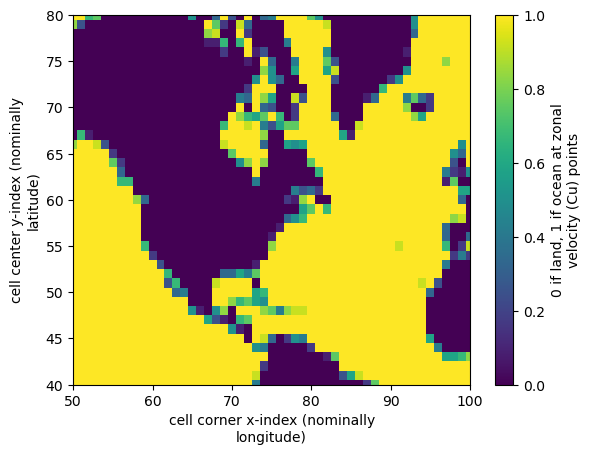

In [131]:
(ds.wet_u).fillna(0.).plot()
plt.xlim(50, 100)
plt.ylim(40, 80)

(40.0, 80.0)

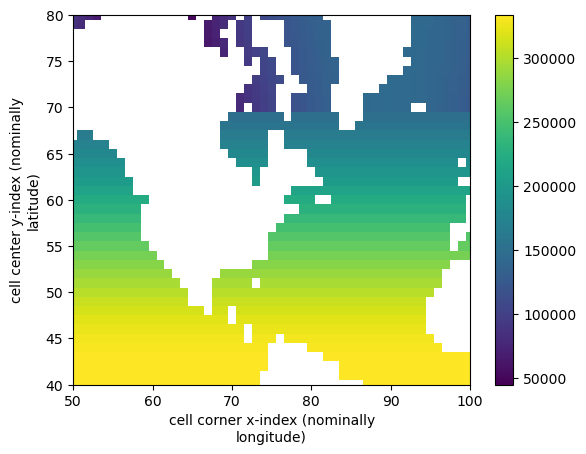

In [132]:
(ds.dyCu/ds.wet_u).fillna(0.).plot()
plt.xlim(50, 100)
plt.ylim(40, 80)

In [133]:
ds.wet.attrs

{'long_name': '0 if land, 1 if ocean at tracer points',
 'cell_methods': 'xh:mean yh:mean time:point',
 'cell_measures': 'area: areacello',
 'note': 'Can be between 0 and 1 if coarse cell includes both wet and dry sub-cells.'}

### Save out example fields

In [134]:
ds[["siconc", "sos", "tos"]].isel(time=slice(0,12)).to_netcdf("../data/surface_ocean_2050.nc")